In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200,height), (1100,height), (500,250)]])
    mask = np.zeros_like(image)
    # Create the mask
    cv2.fillPoly(mask,polygons,255)
    # Apply the mask to the image to remove everything we aren't interested
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

In [23]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if(lines is not None):
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image

In [63]:
image = cv2.imread('test_image.jpg')
# Translate the array in numpy array that is more efficent
lane_image = np.copy(image)
# Create a gray scale image to better analyze it
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
# modify the array to get the blur result
blur = cv2.GaussianBlur(gray,(5,5),0)
# create the gradient image depend on the difference color in the
# image
canny = cv2.Canny(blur, threshold1=50, threshold2=150)
# part of the image we are interested in, the road
cropped_image = region_of_interest(canny)
# Find the line in the image matrix
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
# Draw the line in a black image with the same dimension of the original image
line_image = display_lines(lane_image, lines)
# Draw the lines on top of the original image
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

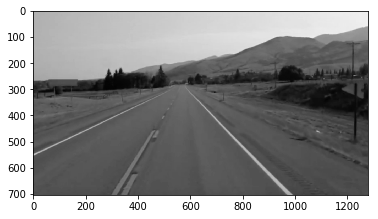

In [64]:
# Show gray image
plt.imshow(blur,cmap='gray', vmin = 0, vmax = 255)
plt.show()

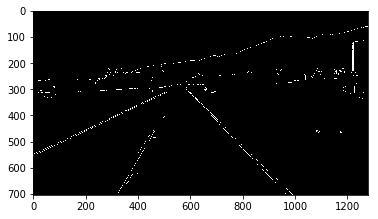

In [65]:
# show canny image
plt.imshow(canny,cmap='gray')
plt.show()

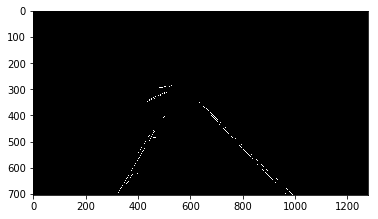

In [66]:
# show cropped image
plt.imshow(cropped_image,cmap='gray')
plt.show()

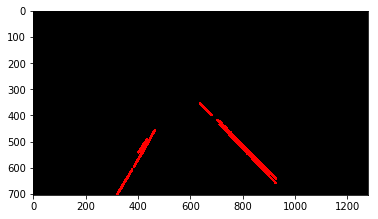

In [67]:
# show line image
plt.imshow(line_image,cmap='gray')
plt.show()

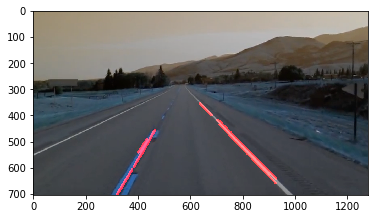

In [68]:
# show combo image between image and lines
plt.imshow(combo_image,cmap='gray')
plt.show()

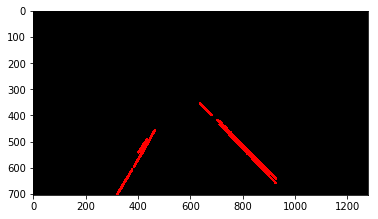

In [82]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
# Draw the line in a black image with the same dimension of the original image
line_image = display_lines(lane_image, lines)
# show combo image between image and lines
plt.imshow(line_image,cmap='gray')
plt.show()

In [92]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*3/5)
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if(slope<0):
            left_fit.append((slope,intercept))
        else: 
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit,axis=0)
    right_fit_average = np.average(right_fit,axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line,right_line])

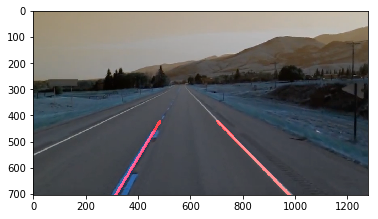

In [94]:
averanged_lines = average_slope_intercept(lane_image, lines)

# Draw again the image with the line lines
# Draw the line in a black image with the same dimension of the original image
line_image = display_lines(lane_image, averanged_lines)
# Draw the lines on top of the original image
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

# Show the result
plt.imshow(combo_image,cmap='gray')
plt.show()

In [96]:
def test():
    i = 0
    while(True):
        i += 1
        yield i

In [98]:
a = test()

In [104]:
next(a)

4